## Import Dependencies

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load Data

In [3]:
#Load in data (We will eventually have this pulled in from a Postgres RDS)
parks_df = pd.read_csv(Path('Resources/parks.csv'))
species_df = pd.read_csv(Path('Resources/species.csv'))
visitation_df = pd.read_csv(Path('Resources/park_visitation.csv'))
mockup_df = pd.read_csv(Path('Resources/mockup_data.csv'))

C:\Users\ohugh\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(parks_df.shape)
parks_df.head()

(56, 6)


,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [5]:
print(species_df.shape)
species_df.Category.unique()

(119248, 14)


array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Spider/Scorpion', 'Insect', 'Invertebrate', 'Fungi',
       'Nonvascular Plant', 'Crab/Lobster/Shrimp', 'Slug/Snail', 'Algae'],
      dtype=object)

In [6]:
print(visitation_df.shape)
visitation_df.head()

(383, 12)


,Park Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average
0,Abraham Lincoln Birthplace NHP,163568.0,169515.0,163928.0,241264.0,148605.0,252495.0,269580.0,260964.0,238226.0,228141,213628.6
1,Acadia NP,2374645.0,2431052.0,2254922.0,2563129.0,2811184.0,3303393.0,3509271.0,3537575.0,3437286.0,2669034,2889149.1
2,Adams NHP,219975.0,336031.0,285501.0,178468.0,183632.0,199301.0,255562.0,121007.0,187400.0,6937,197381.4
3,African Burial Ground NM,108585.0,77624.0,93234.0,54861.0,56348.0,46526.0,43182.0,45035.0,47427.0,7908,58073.0
4,Agate Fossil Beds NM,11617.0,11824.0,10504.0,12440.0,13264.0,15555.0,32038.0,16238.0,16657.0,8722,14885.9


### Create Sample Dataframe for Regression
##### Creating final dataframe that contains Park name, acreage, average number of visitors for the past 10 years, number of species present in each park, number of native species in each park, number of non-native or invasive species in each park

In [7]:
mockup_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Total_Species,Total_Native_Species,Total_NonNative_Species,NonNative_Ratio,Park_Visitors
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1709,1189,485,0.283792,2889149.1
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,1048,939,108,0.103053,1356430.3
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,1389,779,99,0.071274,945142.7
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,2269,2108,112,0.049361,379311.5
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,1726,751,241,0.139629,503466.2


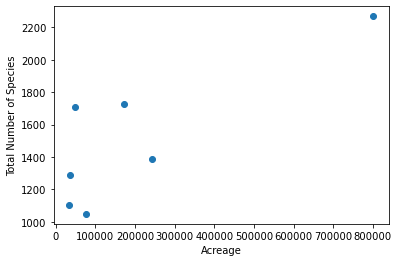

In [8]:
plt.scatter(mockup_df.Acres, mockup_df.Total_Species)
plt.xlabel('Acreage')
plt.ylabel('Total Number of Species')
plt.show()

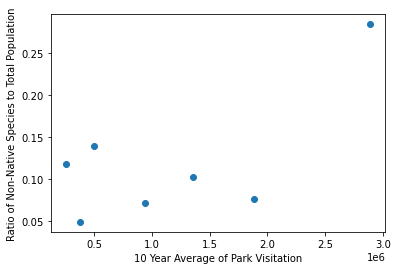

In [10]:
plt.scatter(mockup_df.Park_Visitors, mockup_df.Total_NonNative_Species)
plt.xlabel('10 Year Average of Park Visitation')
plt.ylabel('Total')
plt.show()

In [ ]:
plt.scatter(mockup_df.Park_Visitors, mockup_df.NonNative_Ratio)
plt.xlabel('10 Year Average of Park Visitation')
plt.ylabel('Ratio of Non-Native Species to Total Population')
plt.show()